<a href="https://colab.research.google.com/github/Murad0998/statistics-project/blob/hypotheses/notebooks/GP_3_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Датасет взят из: https://archive.ics.uci.edu/dataset/222/bank+marketing

- `age` — возраст клиента в годах.
- `job` — профессиональная категория клиента.
- `marital` — семейное положение клиента.
- `education` — уровень образования клиента.
- `default` — наличие у клиента кредитного дефолта.
- `housing` — наличие у клиента жилищного кредита.
- `loan` — наличие у клиента потребительского кредита.
- `contact` — тип канала связи, использованного для контакта с клиентом.
- `month` — месяц, в котором осуществлялся последний контакт.
- `day_of_week` — день недели, в который осуществлялся последний контакт.
- `duration` — длительность последнего контакта с клиентом в секундах.
- `campaign` — количество контактов с клиентом в рамках текущей маркетинговой кампании.
- `pdays` — количество дней, прошедших с момента предыдущего контакта с клиентом в прошлых кампаниях.
- `previous` — количество контактов с клиентом в рамках предыдущих маркетинговых кампаний.
- `poutcome` — результат предыдущей маркетинговой кампании для данного клиента.
- `emp.var.rate` — показатель изменения уровня занятости в экономике.
- `cons.price.idx` — индекс потребительских цен, характеризующий уровень инфляции.
- `cons.conf.idx` — индекс потребительской уверенности.
- `euribor3m` — трёхмесячная межбанковская процентная ставка Euribor.
- `nr.employed` — общее количество занятых в экономике (в тысячах).
- `y` — целевая переменная, отражающая факт положительного отклика клиента на предложение.

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv("bank-additional-full.csv", sep=";", quotechar='"')

print("Размер:", df.shape)
display(df.head(5))
display(df.tail(5))

Размер: (41188, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [8]:
print("Информация:")
print(df.info())

print("Пропущенные значения")
na_cnt = df.isna().sum().sort_values(ascending=False)
print(na_cnt[na_cnt > 0])

print("\nДубликат")
print("duplicate rows:", df.duplicated().sum())

Информация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   411

# Краткий вывод:

- числовые показатели экономики -> float
- счётчики / возраст → int
- категориальные → object (пока)

Целевая переменная - y - object, сделаем ее бинарной (0/1)


# `unknown -> NaN`

показывает, в каких столбцах и в каком количестве появились пропуски после замены "unknown" на NaN.

In [9]:
obj_cols = df.select_dtypes(include="object").columns
df[obj_cols] = df[obj_cols].replace("unknown", np.nan)

print("\nПропущенные значения после преобразования в NaN")
na_cnt2 = df.isna().sum().sort_values(ascending=False)
print(na_cnt2[na_cnt2 > 0].to_string())


Пропущенные значения после преобразования в NaN
default      8597
education    1731
housing       990
loan          990
job           330
marital        80


После замены значения "unknown" на NaN мы оценили распределение пропусков по признакам.
Наибольшее количество отсутствующих значений наблюдается в признаке default, что может быть связано с нежеланием клиентов раскрывать информацию о кредитных дефолтах.
Данные пропуски учитывались при дальнейшем анализе и проверке гипотез.

# y -> bin

In [10]:
print(df["y"].value_counts().to_string())

y
no     36548
yes     4640


In [11]:
if df["y"].dtype == "object":
    df["y_bin"] = df["y"].map({"yes": 1, "no": 0})
else:
    df["y_bin"] = df["y"].astype(float)

print("Пропуски:", df["y_bin"].isna().sum())
print(df[["y", "y_bin"]].head(5).to_string())

Пропуски: 0
    y  y_bin
0  no      0
1  no      0
2  no      0
3  no      0
4  no      0


In [12]:
cat_cols = [
    "job","marital","education","default","housing","loan",
    "contact","month","day_of_week","poutcome","y"
]

for c in cat_cols:
    df[c] = df[c].astype("category")

num_cols = [
    "age","duration","campaign","pdays","previous",
    "emp.var.rate","cons.price.idx","cons.conf.idx",
    "euribor3m","nr.employed"
]

for c in num_cols:
    df[c] = pd.to_numeric(df[c], errors="coerce")

print(df.dtypes.to_string())

age                  int64
job               category
marital           category
education         category
default           category
housing           category
loan              category
contact           category
month             category
day_of_week       category
duration             int64
campaign             int64
pdays                int64
previous             int64
poutcome          category
emp.var.rate       float64
cons.price.idx     float64
cons.conf.idx      float64
euribor3m          float64
nr.employed        float64
y                 category
y_bin                int64


На данном этапе были приведены типы данных в соответствие с экономическим и бизнес-смыслом признаков. Категориальные переменные (такие как профессия, семейное положение, уровень образования и характеристики контакта с клиентом) были преобразованы в тип category, что позволяет корректно использовать их при группировках и проверке статистических гипотез. Количественные признаки были приведены к числовым типам, что обеспечивает возможность применения параметрических и непараметрических статистических методов.

В результате данного шага структура датасета была упорядочена, что минимизирует риск ошибок при дальнейшем анализе и создаёт корректную основу для проведения EDA и проверки статистических гипотез.

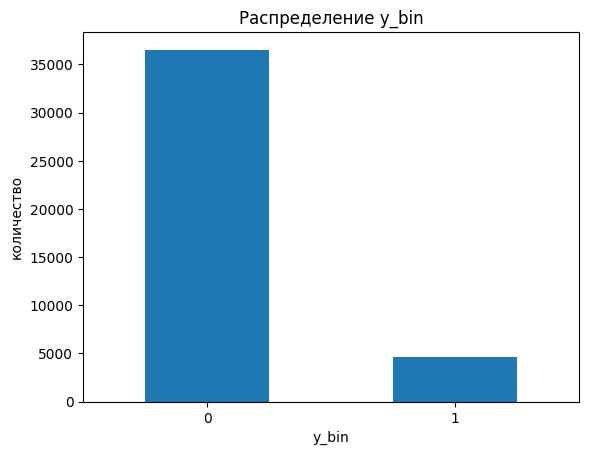

In [13]:
y_counts = df["y_bin"].value_counts(dropna=False).sort_index()

plt.figure()
y_counts.plot(kind="bar")
plt.title("Распределение y_bin")
plt.xlabel("y_bin")
plt.ylabel("количество")
plt.xticks(rotation=0)
plt.show()

Распределение целевой переменной y_bin демонстрирует выраженный дисбаланс классов. Подавляющее большинство наблюдений относится к классу y = 0, тогда как доля положительного исхода y = 1 составляет порядка 10–12% от общего числа наблюдений. Такой дисбаланс является типичным для маркетинговых кампаний, где отклик клиентов на предложение является редким событием.

Наличие дисбаланса классов важно учитывать при дальнейшем анализе, поскольку при большом объёме выборки даже небольшие различия между группами могут быть статистически значимыми, но при этом не иметь существенной практической значимости. В связи с этим в дальнейшем анализе будет уделено внимание не только p-value, но и величине эффекта и интерпретации результатов с точки зрения бизнеса.

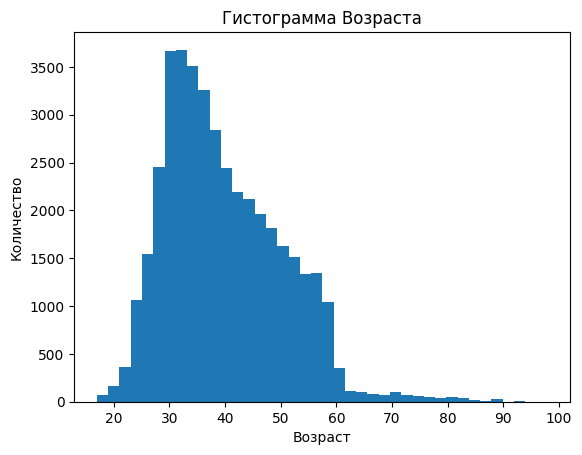

In [14]:
plt.figure()
df["age"].dropna().plot(kind="hist", bins=40)
plt.title(f"Гистограмма Возраста")
plt.xlabel("Возраст")
plt.ylabel("Количество")
plt.show()

# вывод по распределению возраста

Распределение возраста клиентов является асимметричным с правым хвостом. Основная масса наблюдений сосредоточена в диапазоне примерно от 25 до 55 лет, с пиком в районе 30–40 лет. При этом наблюдается наличие клиентов старших возрастных групп, что формирует длинный правый хвост распределения.

Полученная форма распределения указывает на отклонение от нормальности, что следует учитывать при дальнейшем статистическом анализе.

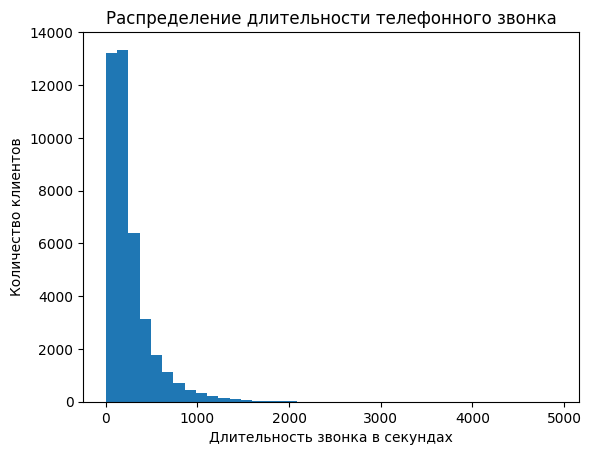

In [15]:
plt.figure()
df["duration"].dropna().plot(kind="hist", bins=40)
plt.title("Распределение длительности телефонного звонка")
plt.xlabel("Длительность звонка в секундах")
plt.ylabel("Количество клиентов")
plt.show()

Распределение длительности телефонного звонка характеризуется выраженной правосторонней асимметрией с длинным правым хвостом. Большинство наблюдений сосредоточено в области коротких звонков, что указывает на то, что в большинстве случаев контакт с клиентом завершается достаточно быстро. При этом в данных присутствуют редкие, но очень длительные разговоры, отражающие случаи высокой вовлечённости клиентов и формирующие длинный хвост распределения. Форма распределения существенно отклоняется от нормальной, что следует учитывать при дальнейшем статистическом анализе и выборе методов проверки гипотез.

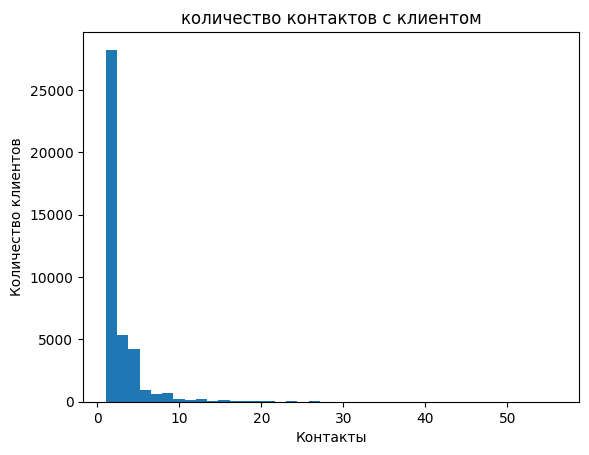

In [16]:
plt.figure()
df["campaign"].dropna().plot(kind="hist", bins=40)
plt.title("количество контактов с клиентом")
plt.xlabel("Контакты")
plt.ylabel("Количество клиентов")
plt.show()

Распределение количества контактов с клиентом в рамках текущей маркетинговой кампании характеризуется выраженной правосторонней асимметрией. Подавляющее большинство клиентов контактировались один–два раза, тогда как повторные обращения встречаются значительно реже. При этом в данных присутствуют отдельные наблюдения с большим числом контактов, формирующие длинный правый хвост распределения. Такая форма распределения указывает на наличие редких, но экстремальных значений и отклонение от нормальности, что необходимо учитывать при дальнейшем статистическом анализе и выборе методов проверки гипотез.

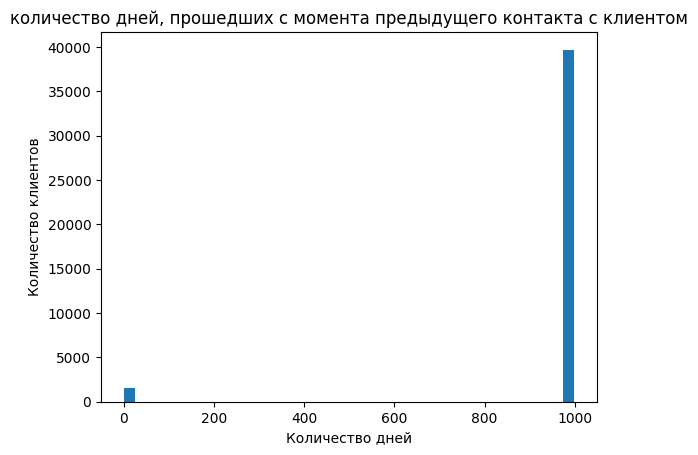

In [17]:
plt.figure()
df["pdays"].dropna().plot(kind="hist", bins=40)
plt.title("количество дней, прошедших с момента предыдущего контакта с клиентом")
plt.xlabel("Количество дней")
plt.ylabel("Количество клиентов")
plt.show()

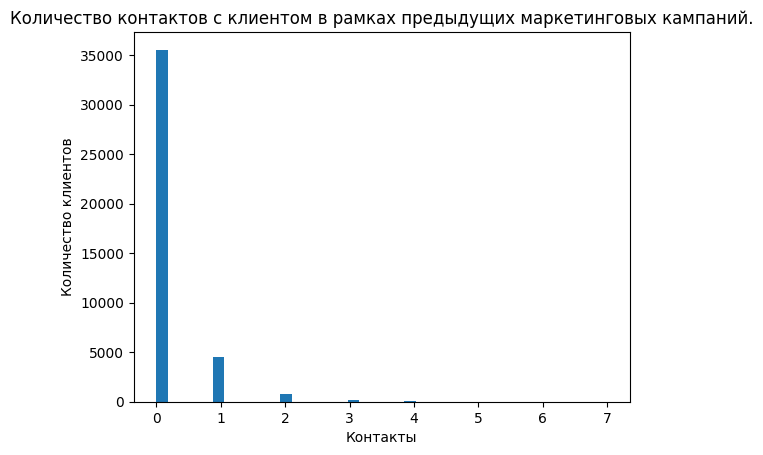

In [18]:
plt.figure()
df["previous"].dropna().plot(kind="hist", bins=40)
plt.title("Количество контактов с клиентом в рамках предыдущих маркетинговых кампаний.")
plt.xlabel("Контакты")
plt.ylabel("Количество клиентов")
plt.show()

# Категории

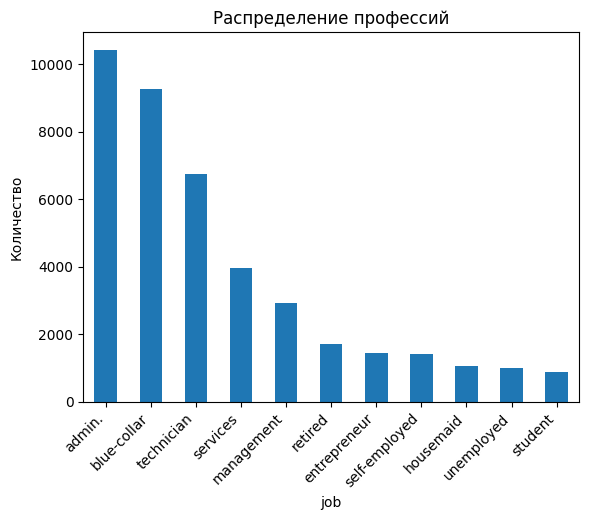

In [19]:
df["job"].value_counts().plot(kind="bar")
plt.title("Распределение профессий")
plt.xlabel("job")
plt.ylabel("Количество")
plt.xticks(rotation=45, ha="right")
plt.show()

Распределение профессий в датасете является неоднородным: наибольшее число клиентов относится к категориям administrative, blue-collar и technician, которые формируют основную часть выборки. Существенно меньшая доля наблюдений приходится на профессии из сфер услуг и управления, а такие категории, как student, unemployed и housemaid, представлены в данных значительно реже. Наличие выраженно доминирующих и редких категорий важно учитывать при дальнейшем анализе, поскольку малочисленные группы могут давать нестабильные оценки и требовать аккуратной интерпретации при проверке статистических гипотез.

/tmp/ipython-input-2423857591.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rate = df.groupby("job")["y_bin"].mean().sort_values(ascending=False)


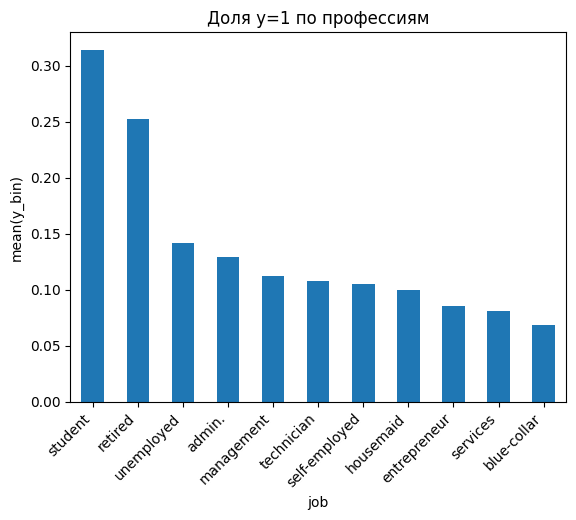

In [20]:
rate = df.groupby("job")["y_bin"].mean().sort_values(ascending=False)

rate.plot(kind="bar")
plt.title("Доля y=1 по профессиям")
plt.xlabel("job")
plt.ylabel("mean(y_bin)")
plt.xticks(rotation=45, ha="right")
plt.show()

Доля положительного отклика (y = 1) существенно различается между профессиональными группами. Наиболее высокие значения наблюдаются у студентов и пенсионеров, что указывает на их повышенную склонность откликаться на предложение по сравнению с другими категориями клиентов. Средние значения доли отклика характерны для административных работников, менеджеров и технических специалистов. Наименьшая вероятность отклика наблюдается у клиентов, занятых в сфере blue-collar и services, что может быть связано с особенностями их занятости и финансового поведения. Полученные различия свидетельствуют о наличии связи между профессиональной принадлежностью и вероятностью отклика, что делает признак job обоснованным кандидатом для дальнейшей проверки статистических гипотез.

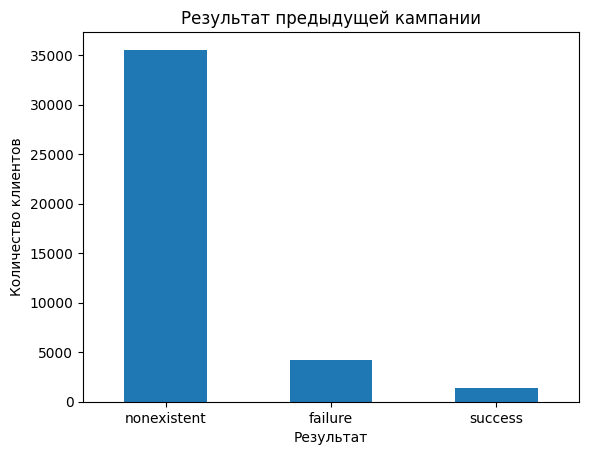

In [21]:
pout_counts = df["poutcome"].value_counts()

plt.figure()
pout_counts.plot(kind="bar")
plt.title("Результат предыдущей кампании")
plt.xlabel("Результат")
plt.ylabel("Количество клиентов")
plt.xticks(rotation=0)
plt.show()

вывод по распределению результата предыдущей кампании (poutcome)

Подавляющее большинство клиентов относится к категории nonexistent, что означает отсутствие контактов с ними в рамках предыдущих маркетинговых кампаний. Существенно меньшая доля клиентов имеет опыт участия в прошлых кампаниях с отрицательным результатом (failure), и лишь небольшая часть клиентов ранее демонстрировала положительный отклик (success). Такое распределение указывает на то, что основная часть текущей выборки состоит из новых клиентов, для которых отсутствует история взаимодействия с прошлыми кампаниями. Данный факт важно учитывать при дальнейшем анализе, поскольку наличие успешного или неуспешного предыдущего контакта может существенно влиять на вероятность отклика в текущей кампании.

/tmp/ipython-input-3168020796.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pout_rate = df.groupby("poutcome")["y_bin"].mean().sort_values(ascending=False)


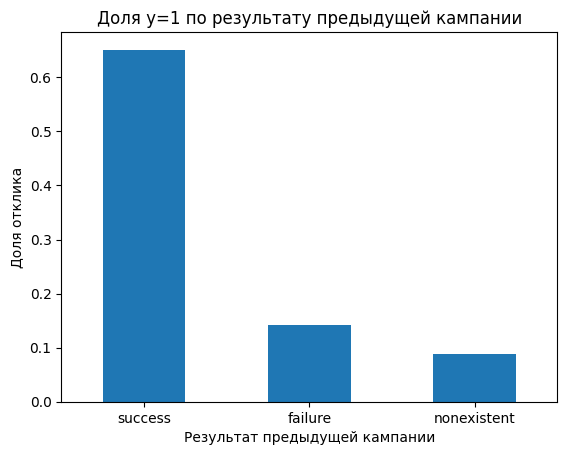

In [22]:
pout_rate = df.groupby("poutcome")["y_bin"].mean().sort_values(ascending=False)

plt.figure()
pout_rate.plot(kind="bar")
plt.title("Доля y=1 по результату предыдущей кампании")
plt.xlabel("Результат предыдущей кампании")
plt.ylabel("Доля отклика")
plt.xticks(rotation=0)
plt.show()

вывод по доле отклика в зависимости от результата предыдущей кампании (poutcome)

Вероятность положительного отклика в текущей кампании существенно зависит от результата предыдущего взаимодействия с клиентом. Наиболее высокая доля y = 1 наблюдается у клиентов, для которых предыдущая кампания завершилась успехом (success), что указывает на крайне высокую вероятность повторного отклика. Для клиентов с неуспешным предыдущим контактом (failure) вероятность отклика заметно ниже, однако всё же превышает уровень клиентов, не имевших контактов в прошлых кампаниях (nonexistent). Полученные различия свидетельствуют о сильной связи между результатом предыдущей кампании и откликом в текущей, что делает признак poutcome одним из ключевых факторов и обоснованным кандидатом для формальной проверки статистической гипотезы.

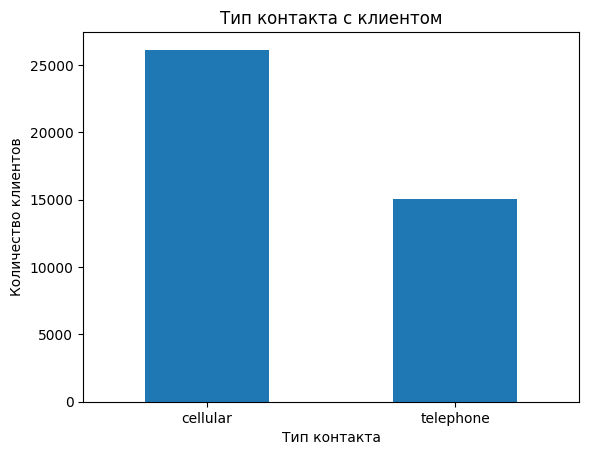

In [23]:
contact_counts = df["contact"].value_counts()

plt.figure()
contact_counts.plot(kind="bar")
plt.title("Тип контакта с клиентом")
plt.xlabel("Тип контакта")
plt.ylabel("Количество клиентов")
plt.xticks(rotation=0)
plt.show()

вывод по распределению типа контакта (contact)

В датасете преобладает контакт с клиентами по мобильной связи (cellular), тогда как телефонные звонки по стационарной связи (telephone) используются значительно реже. Это указывает на то, что основным каналом взаимодействия с клиентами в рассматриваемой маркетинговой кампании является мобильная связь. Существенная разница в объёмах наблюдений между типами контакта может оказывать влияние на интерпретацию дальнейшего анализа и должна учитываться при сравнении вероятностей отклика по данному признаку.

/tmp/ipython-input-2482011908.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contact_rate = df.groupby("contact")["y_bin"].mean().sort_values(ascending=False)


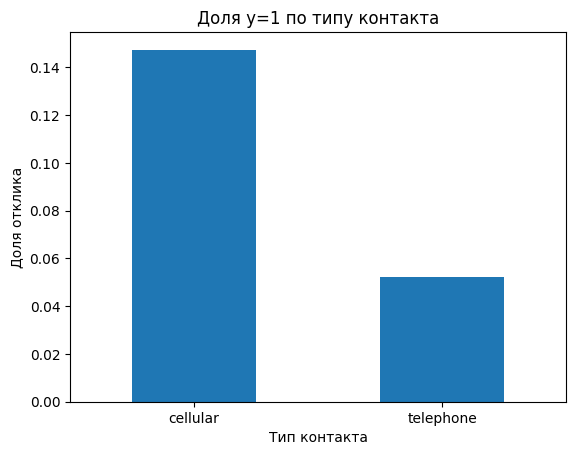

In [24]:
contact_rate = df.groupby("contact")["y_bin"].mean().sort_values(ascending=False)

plt.figure()
contact_rate.plot(kind="bar")
plt.title("Доля y=1 по типу контакта")
plt.xlabel("Тип контакта")
plt.ylabel("Доля отклика")
plt.xticks(rotation=0)
plt.show()

вывод по доле отклика в зависимости от типа контакта (contact)

Вероятность положительного отклика существенно различается в зависимости от типа контакта с клиентом. Контакты по мобильной связи (cellular) характеризуются заметно более высокой долей отклика по сравнению с контактами по стационарному телефону (telephone). Это указывает на то, что мобильная связь является более эффективным каналом взаимодействия с клиентами в рамках рассматриваемой маркетинговой кампании. Выявленное различие носит выраженный характер и делает признак contact обоснованным кандидатом для формальной проверки статистической гипотезы.

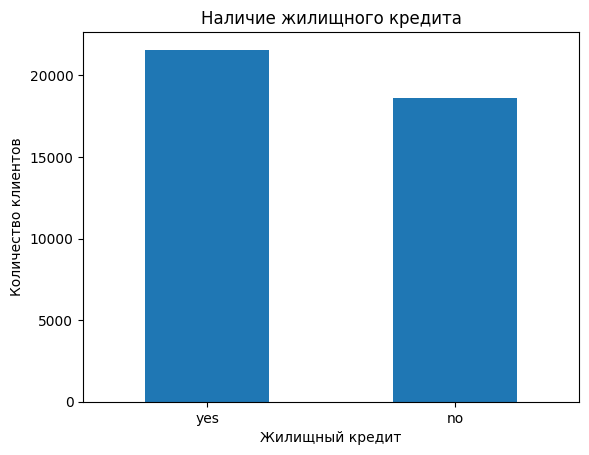

In [25]:
housing_counts = df["housing"].value_counts()

plt.figure()
housing_counts.plot(kind="bar")
plt.title("Наличие жилищного кредита")
plt.xlabel("Жилищный кредит")
plt.ylabel("Количество клиентов")
plt.xticks(rotation=0)
plt.show()

вывод по наличию жилищного кредита (housing)

Распределение клиентов по признаку наличия жилищного кредита является относительно сбалансированным, однако доля клиентов с действующим жилищным кредитом (yes) несколько превышает долю клиентов без него (no). Это указывает на то, что значительная часть выборки представлена клиентами с долгосрочными финансовыми обязательствами. Само по себе распределение не позволяет сделать вывод о влиянии жилищного кредита на вероятность отклика, однако данный признак является потенциально значимым и требует дополнительного анализа в связке с целевой переменной.

/tmp/ipython-input-1810224570.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  housing_rate = df.groupby("housing")["y_bin"].mean().sort_values(ascending=False)


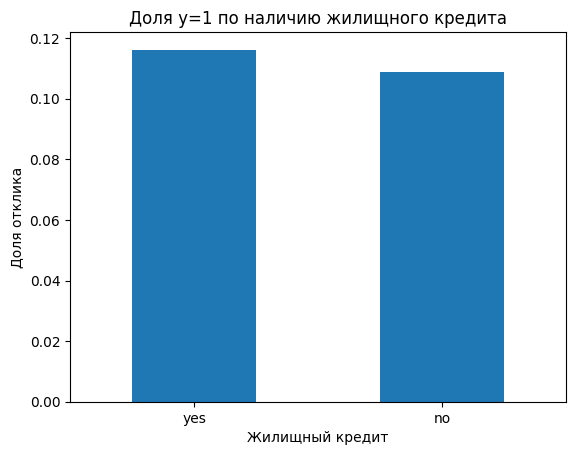

In [26]:
housing_rate = df.groupby("housing")["y_bin"].mean().sort_values(ascending=False)

plt.figure()
housing_rate.plot(kind="bar")
plt.title("Доля y=1 по наличию жилищного кредита")
plt.xlabel("Жилищный кредит")
plt.ylabel("Доля отклика")
plt.xticks(rotation=0)
plt.show()

вывод по доле отклика в зависимости от наличия жилищного кредита (housing)

Вероятность положительного отклика у клиентов с жилищным кредитом и без него отличается незначительно. Клиенты, имеющие жилищный кредит (yes), демонстрируют лишь слегка более высокую долю отклика по сравнению с клиентами без кредита (no). Наблюдаемая разница является небольшой и не позволяет на основании визуального анализа сделать однозначный вывод о существенном влиянии наличия жилищного кредита на вероятность отклика. Для подтверждения или опровержения наличия статистически значимого эффекта требуется формальная проверка гипотезы с использованием статистического теста.

In [27]:
#df.to_csv("bank_clean.csv", index=False)
#from google.colab import files
#files.download("bank_clean.csv")

# Категориальные

# Гипотеза

вероятность подписки различается в зависимости от семейного положения.

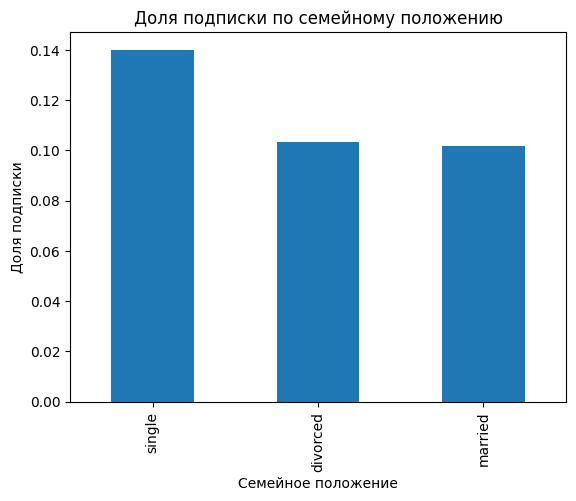

In [32]:
rate = (
    df
    .groupby("marital", observed=True)["y_bin"]
    .mean()
    .sort_values(ascending=False)
)

plt.figure()
rate.plot(kind="bar")
plt.title("Доля подписки по семейному положению")
plt.xlabel("Семейное положение")
plt.ylabel("Доля подписки")
plt.show()

# Гипотеза

наличие потребительского кредита связано с вероятностью подписки.

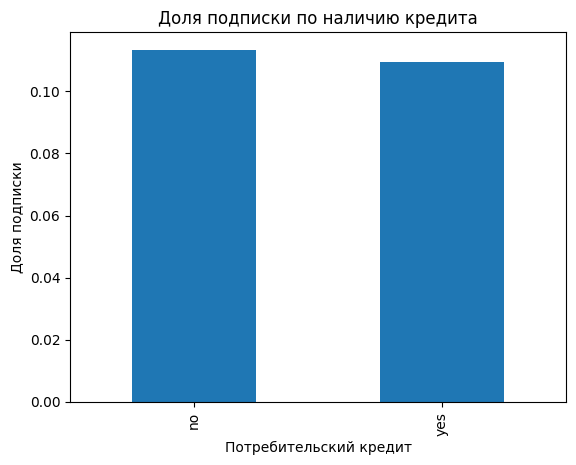

In [33]:
rate = (
    df
    .groupby("loan", observed=True)["y_bin"]
    .mean()
)

plt.figure()
rate.plot(kind="bar")
plt.title("Доля подписки по наличию кредита")
plt.xlabel("Потребительский кредит")
plt.ylabel("Доля подписки")
plt.show()

# Числовые переменные

# Гипотеза

распределение возраста различается между группами y=0 и y=1.

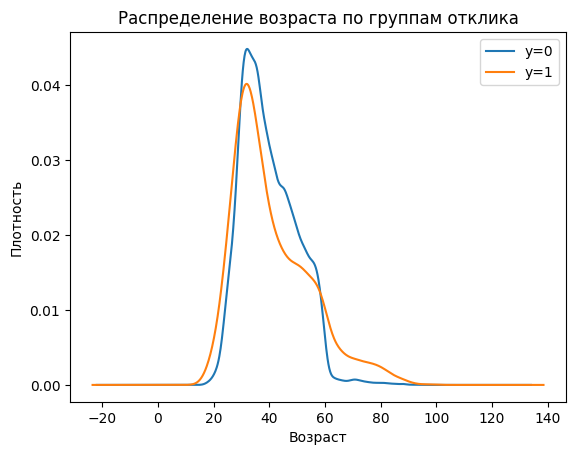

In [35]:
plt.figure()

df.loc[df["y_bin"] == 0, "age"].plot(kind="kde", label="y=0")
df.loc[df["y_bin"] == 1, "age"].plot(kind="kde", label="y=1")

plt.title("Распределение возраста по группам отклика")
plt.xlabel("Возраст")
plt.ylabel("Плотность")
plt.legend()
plt.show()

# Гипотеза

клиенты, с которыми ранее связывались, отличаются по вероятности подписки.

<Figure size 640x480 with 0 Axes>

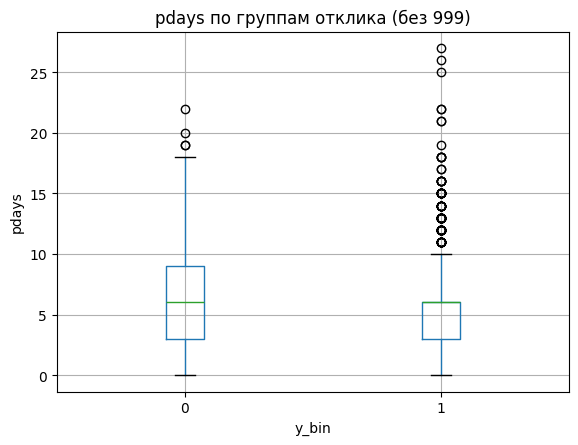

In [36]:
df_pdays = df[df["pdays"] < 999]

plt.figure()
df_pdays.boxplot(column="pdays", by="y_bin")
plt.title("pdays по группам отклика (без 999)")
plt.suptitle("")
plt.xlabel("y_bin")
plt.ylabel("pdays")
plt.show()

# Гипотеза

распределение количества контактов различается между группами отклика.

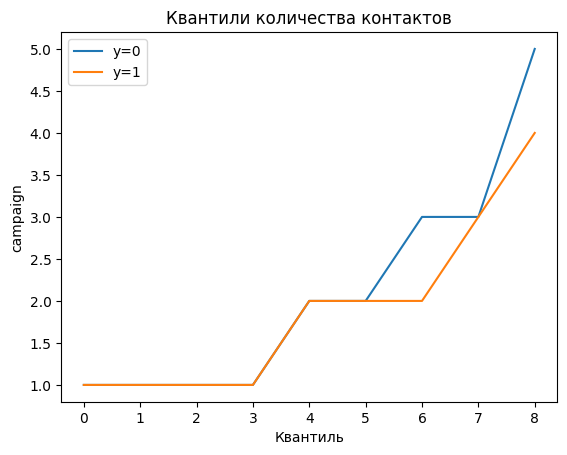

In [37]:
plt.figure()

for label in [0, 1]:
    q = df.loc[df["y_bin"] == label, "campaign"].quantile(
        np.linspace(0.1, 0.9, 9)
    )
    plt.plot(q.values, label=f"y={label}")

plt.title("Квантили количества контактов")
plt.xlabel("Квантиль")
plt.ylabel("campaign")
plt.legend()
plt.show()

# Гипотеза

влияние длительности контакта на отклик различается в зависимости от типа контакта.

/tmp/ipython-input-605510850.py:5: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  .pivot_table(


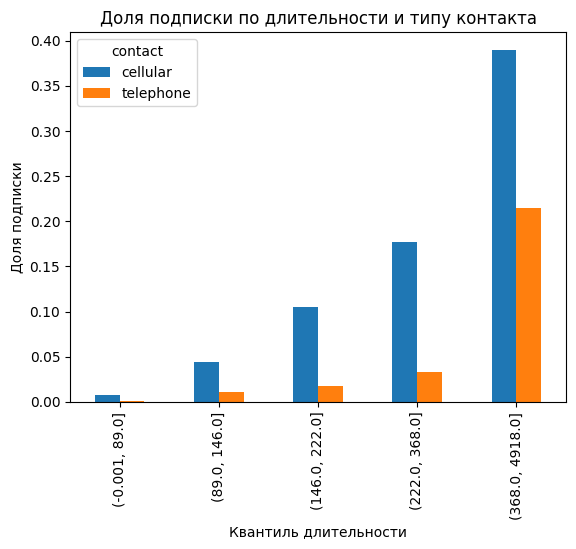

In [38]:
df["duration_bin"] = pd.qcut(df["duration"], 5)

pivot = (
    df
    .pivot_table(
        values="y_bin",
        index="duration_bin",
        columns="contact",
        aggfunc="mean"
    )
)

pivot.plot(kind="bar")
plt.title("Доля подписки по длительности и типу контакта")
plt.xlabel("Квантиль длительности")
plt.ylabel("Доля подписки")
plt.show()